### Q1) Generate 100 samples that are uniformly distributed over (0,1). Plot a histogram of the samples. Also, plot an empirical CDF.

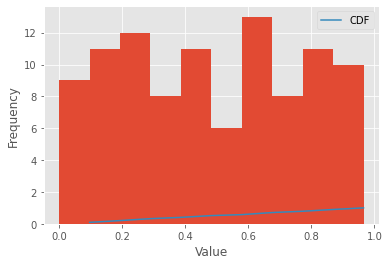

In [62]:
from numpy import *
from math import *
import matplotlib.pyplot as plt

#Function for calculating CDF and PDF
def cdf_pdf(n):
  pdf = n/sum(n)
  cdf = cumsum(pdf)
  return [pdf,cdf]

#Generating random 100 samples uniformly distributed over (0,1).
data = random.uniform(0,1,100)

#Using statistical measure of RANGE we calculate the width of intervals of our histogram
range_data = max(data)-min(data)
n = 100
num_intervals = 10
width_interval = range_data/num_intervals
bin_list = [0]
count = 0
for i in range(num_intervals):
  count += width_interval
  bin_list.append(count)

num, bins, ignored = plt.hist(data, bin_list)
output = cdf_pdf(num)
pdf = output[0]
cdf = output[1] #CDF is cumultative sum of pdfs over the range


plt.plot(bins[1:], cdf, label = "CDF") #We start after the 1st interval ends for plot the CDF line"""
plt.style.use('ggplot') #Stylised my histogram by emulating a ggplot
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Q2) Generate 100 samples that are uniformly distributed over (75,110). Plot a histogram of the samples. Also, plot an empirical CDF.

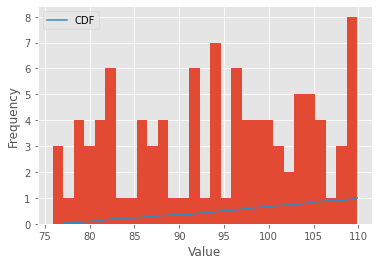

In [63]:
from numpy import *
from math import *
import matplotlib.pyplot as plt

#Function for calculating CDF and PDF
def cdf_pdf(n):
  pdf = n/sum(n)
  cdf = cumsum(pdf)
  return [pdf,cdf]

#Generating random 100 samples uniformly distributed over (75,110).
data = random.uniform(75,110,100)

#Using statistical measure of RANGE we calculate the width of intervals of our histogram
range_data = max(data)-min(data)
n = 100
width_interval = range_data/10
num_bin = int(n/width_interval) #We calculate number of intervals from the width interval we calculated using the range
bin_list = [0]

num, bins, ignored = plt.hist(data, num_bin)
output = cdf_pdf(num)
pdf = output[0]
cdf = output[1] #CDF is cumultative sum of pdfs over the range


plt.plot(bins[1:], cdf, label = "CDF") #We start after the 1st interval ends for plot the CDF line"""
plt.style.use('ggplot') #Stylised my histogram by emulating a ggplot
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Q3) Write a function that uses the uniform distribution (0,1) to generate m samples from a Bernoulli RV with parameter p as input.


In [64]:
m = int(input("How many samples? "))
p = float(input("Parameter 'p' for your Bernoulli RV: "))

How many samples? 1000
Parameter 'p' for your Bernoulli RV: 0.6


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Uniform Distribution ')]

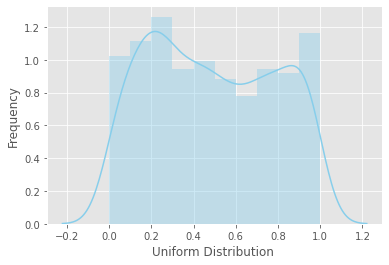

In [65]:
from scipy.stats import uniform
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
lower = 0
upper = 1

def data_generator(m, lower, upper):
  data = uniform.rvs(size = m, loc = lower, scale = upper)
  return data
uniform_data = data_generator(m, lower, upper)
#print(uniform_data)

#Histogram of the uniform distribution created between 0 and 1
ax = sns.distplot(uniform_data, bins = 10, kde = True, color = 'skyblue')
ax.set(xlabel='Uniform Distribution ', ylabel='Frequency')

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Value')]

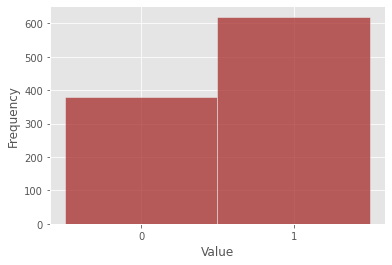

In [66]:
#Function to generate sample from Bernoulli RV
def bernoulli_generator(p, data):
  bernoulli = np.where(data < p, 1, 0)
  return bernoulli

data_bern = bernoulli_generator(p, uniform_data)
bin_edges = np.arange(data_bern.min()-0.5, data_bern.max()+1.5, 1)
ax = sns.histplot(data_bern, bins = bin_edges, color = 'brown')
plt.xticks(np.arange(data_bern.min(), data_bern.max()+1, 1))
ax.set(xlabel='Value', ylabel='Frequency')

### Q4) Write a function (starting from uniform rand (0,1) or preferably the Q3 implementation of the Bern RV) that generates m samples from a geometric RV with parameter p as input.

In [67]:
m = int(input("Value of m: "))
p = float(input("Value of p: "))

Value of m: 1000
Value of p: 0.7


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Value')]

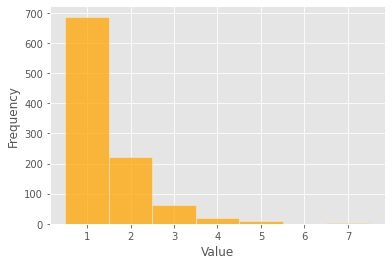

In [68]:
#Function to generate m samples from a Geometric RV 
def geo_generator(m,p):
  data_geometric = np.empty(m, dtype = int)
  for i in range(m):
    x = 0
    val = 0
    while x != 1:
      data_uniform = uniform.rvs(size=1, loc=0, scale=1)
      val += 1
      if data_uniform[0] < p:
        x = 1
    data_geometric[i] = val
  return data_geometric
  
geometric = geo_generator(m,p)
bin_edges = np.arange(geometric.min()-0.5, geometric.max()+1.5, 1)
ax = sns.histplot(geometric, bins = bin_edges, color = 'orange')
plt.xticks(np.arange(geometric.min(), geometric.max()+1, 1))
ax.set(xlabel='Value', ylabel='Frequency')

### Q5) Write a function that generates m samples from a binomial RV with parameters (n,p) as inputs. Starting from uniform rand (0,1) or preferably the Q3 implementation of the Bern RV.

In [69]:
m = int(input("Value of m: "))
n = int(input("Value of n: "))
p = float(input("Value of p: "))

Value of m: 1000
Value of n: 10
Value of p: 0.6


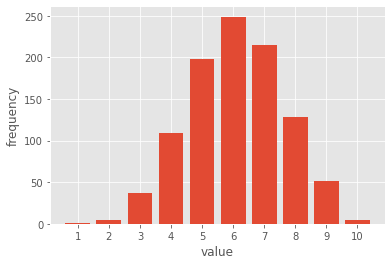

In [70]:
from scipy.stats import uniform
import numpy as np
import matplotlib.pyplot as plt

#Function to generate m samples from Binomial RV
def sample_generator(m,n,p):
  binomial = np.empty(m, dtype = int)
  for i in range(m):
    data = uniform.rvs(size = n, loc = 0, scale = 1)
    bernoulli = np.where(data < p, 1, 0)
    binomial[i] = np.sum(bernoulli)
  return binomial

data_binomial = sample_generator(m,n,p)
bin_edges = np.arange(data_binomial.min()-0.5, data_binomial.max()+1.5, 1)
plt.hist(data_binomial, bins = bin_edges, rwidth = 0.8)
plt.xticks(np.arange(data_binomial.min(), data_binomial.max()+1, 1))
plt.xlabel('value')
plt.ylabel('frequency')
plt.show()

### Q6) Write a function that generates m samples from a Poisson RV with parameter \alpha as input.

In [71]:
m = int(input("Value of m is: "))
alpha = float(input("Value of alpha is: "))

Value of m is: 1000
Value of alpha is: 1.5


[4 2 1 1 1 1 2 1 1 0 0 1 0 0 4 1 0 1 0 0 1 0 2 0 1 2 2 1 0 2 2 1 1 2 2 2 2
 0 0 1 1 2 0 2 5 2 1 0 1 2 3 4 0 1 4 0 0 2 1 1 1 1 0 0 1 3 2 2 2 0 0 1 1 0
 0 3 1 3 1 1 3 1 1 1 2 2 1 1 0 1 3 0 0 4 2 0 3 2 0 1 0 3 4 4 1 3 0 0 1 1 4
 3 0 3 0 2 0 0 0 3 0 1 1 1 0 2 1 0 1 4 1 1 2 4 0 0 2 0 0 0 1 1 1 0 1 1 0 1
 3 2 1 1 1 3 0 2 0 0 1 1 0 2 1 3 1 0 1 1 4 2 3 3 1 2 0 1 0 1 2 0 3 2 1 0 2
 2 4 2 2 2 1 2 1 1 0 3 0 1 2 3 1 0 0 1 1 1 2 1 0 2 3 1 1 0 1 0 0 1 4 1 2 0
 2 1 0 3 1 0 0 3 0 2 0 0 2 1 3 1 0 1 3 2 1 2 1 2 1 4 2 1 3 0 0 1 0 3 1 1 1
 2 3 2 1 1 2 0 2 0 0 4 2 0 0 0 2 2 0 1 1 1 2 3 1 0 0 1 1 1 1 1 1 3 1 5 6 1
 3 1 2 1 3 4 2 1 0 1 3 2 0 3 1 0 3 1 0 1 0 3 1 0 0 1 0 3 2 0 0 2 2 3 0 1 3
 1 0 3 1 1 1 1 3 4 1 1 3 3 2 1 0 2 3 0 4 3 0 0 2 1 0 1 0 2 4 0 1 1 1 0 1 2
 1 1 4 1 2 3 1 3 2 1 1 0 1 1 3 1 4 3 4 1 1 2 1 2 0 1 1 4 1 1 1 1 1 1 1 4 0
 2 2 0 0 0 0 1 1 3 1 2 4 1 1 2 2 3 1 2 2 2 2 1 4 2 2 2 0 1 2 2 0 0 2 2 3 2
 0 1 2 2 1 0 2 3 0 3 2 1 2 2 1 5 1 3 3 0 1 2 2 2 1 2 1 2 1 2 3 3 1 1 2 3 0
 3 1 0 0 3 0 1 0 0 0 0 3 

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Poisson Distribution')]

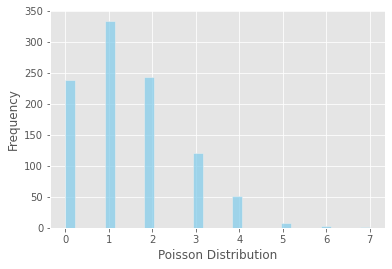

In [72]:
from scipy.stats import poisson
import seaborn as sns

#Function to generate m samples from Poisson RV
def poisson_sample_generator(m, alpha):
  data = poisson.rvs(alpha, size = m)
  return data

data_poisson = poisson_sample_generator(m, alpha)
print(data_poisson)

#Histogram to represent this generated data
intervals = int(m**(0.5))
ax = sns.histplot(data_poisson,
                  bins=intervals,
                  kde = False,
                  color='skyblue')
ax.set(xlabel='Poisson Distribution', ylabel='Frequency')

### Q7) Write a function that generates m samples from a Gaussian RV with mean and std deviation as input.

Value of m: 1000
Value of mean: 0
Value of Standard Deviation: 2


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Gaussian Distribution')]

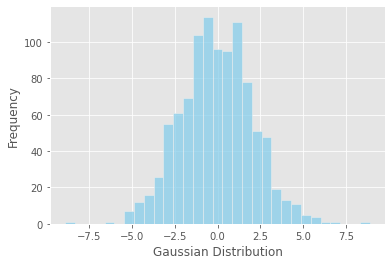

In [79]:
import random
import seaborn as sns

m = int(input('Value of m: '))
mean = float(input('Value of mean: '))
std_dev = float(input('Value of Standard Deviation: '))

def sample_generator(m, x, y):
  arr = []
  for i in range(m):
    arr.append(random.gauss(x, y))
  return arr

intervals = int(m**(0.5))
generated_sample = sample_generator(m, mean, std_dev) #This array stores the generated samples
                                    
#Plotting the sample using a histogram
ax = sns.histplot(generated_sample, bins = intervals, color = 'skyblue')
ax.set(xlabel='Gaussian Distribution', ylabel='Frequency')

### Q8) Write a function that generates m samples from an exponential RV with the rate parameter as input.

Value of m: 1000
Value of rate parameter i.e. lambda: 2


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Exponential Distribution')]

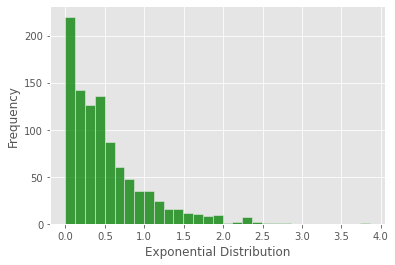

In [74]:
from numpy import random 
import seaborn as sns

m = int(input("Value of m: "))
rate = float(input("Value of rate parameter i.e. lambda: "))

def data_generator_exp(m, rate):
  data = random.exponential(1/rate, size = m)
  return data

#Function called to generate m samples from an exponential RV
data_generated = data_generator_exp(m, rate)
# print(data_generated)

#Plotting the generated sample using a histogram
intervals = int(m**(0.5))
ax = sns.histplot(data_generated, bins = intervals, color = 'green')
ax.set(xlabel='Exponential Distribution', ylabel='Frequency')

### Q9) Generate m=1, 2,..., 1000 samples from the Bernoulli RV (use the function created for the question above) and plot the sample mean for each m. Alongside also plot the parameter p of the Bernoulli RV. Do you see the sample mean converge to the expected value of the Bernoulli RV? For what smallest value of m has the sample mean more or less converged to the parameter of the Bernoulli RV?

In [84]:
m = int(input("Value of m is: "))
p = float(input("Value of p is: "))

Value of m is: 1000
Value of p is: 0.7


[0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1
 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 0 1
 1 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 1 1
 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 0
 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1
 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0
 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 0
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1
 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 0 1 1
 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1
 1 0 1 0 1 1 1 1 1 1 0 1 

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Bernoulli Distribution')]

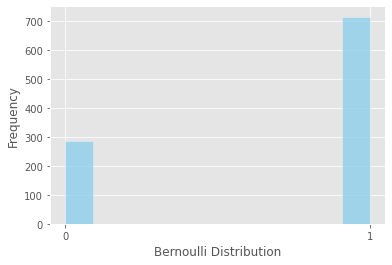

In [85]:
from scipy.stats import bernoulli
import matplotlib.pyplot as plt
import random
import numpy as np

#Function to generate m = 1000 samples from Bernoulli RV
def bern_generator(a,b):
  data_bern = bernoulli.rvs(size = a, p = b)
  return data_bern

data_generated = bern_generator(m,p)
print(data_generated)

#Plotting the generated sample
bin_edges = np.arange(data_generated.min()-0.5, data_generated.max()+1.5, 1)
ax = sns.histplot(data_generated,
                 kde=False,
                 color = "skyblue")
plt.xticks(np.arange(data_generated.min(), data_generated.max()+1, 1))
ax.set(xlabel='Bernoulli Distribution', ylabel='Frequency')

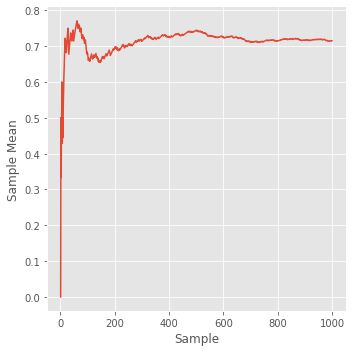

In [86]:
#Sample Mean Plotting

X = [] #Stores all sample values
for i in range(m):
  X.append(i+1)
Y = []
for i in range(m):
  num = sum(data_generated[:(i+1)])
  freq = i+1
  mean = num/freq
  Y.append(mean)

ax = sns.relplot(x = X, y = Y, kind = 'line')
ax.set(xlabel = 'Sample', ylabel = 'Sample Mean')

#Yes, we can see it converging to the expected value of the Bernoulli RV

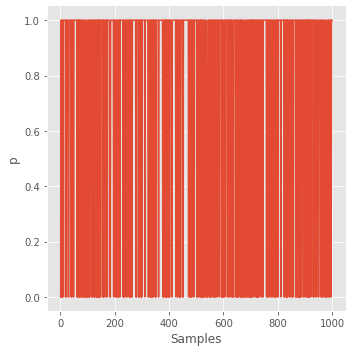

In [87]:
#Bernoulli RV vs 'p' plotting

ax2 = sns.relplot(x = X, y = data_generated, kind = 'line')
ax2.set(xlabel = 'Samples', ylabel = 'p')